<a href="https://colab.research.google.com/github/Rishabh2004580/Iris-Classification/blob/main/iris_classificationass_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print("=== Decision Tree ===")

=== Decision Tree ===


In [ ]:
param_grid_dt = {
    "max_depth": [None, 2, 3, 4, 5],
    "min_samples_split": [2, 3, 4, 5],
    "criterion": ["gini", "entropy"]
}
dt = DecisionTreeClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs_dt = GridSearchCV(dt, param_grid_dt, cv=cv, scoring="accuracy")
gs_dt.fit(X_train, y_train)
best_dt = gs_dt.best_estimator_

print("Best params:", gs_dt.best_params_)


Best params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 4}


In [ ]:
y_pred_dt = best_dt.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
cv_scores_dt = cross_val_score(best_dt, X, y, cv=5)
print(f"5-fold CV Accuracy: {cv_scores_dt.mean():.4f} ± {cv_scores_dt.std():.4f}")

Test Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
5-fold CV Accuracy: 0.9533 ± 0.0340


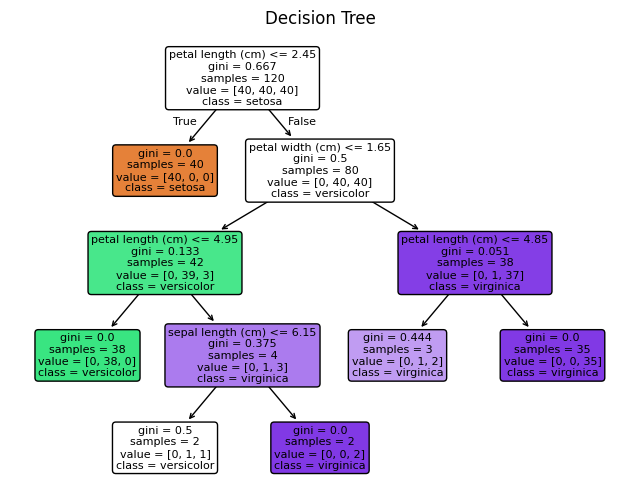

In [ ]:
plt.figure(figsize=(8, 6))
plot_tree(best_dt, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()


In [ ]:
print("\n=== Logistic Regression ===")
# Hyperparameter tuning
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["lbfgs", "newton-cg", "saga"],
    "max_iter": [200, 500]
}
lr = LogisticRegression(multi_class="auto", random_state=42)
gs_lr = GridSearchCV(lr, param_grid_lr, cv=cv, scoring="accuracy")
gs_lr.fit(X_train, y_train)
best_lr = gs_lr.best_estimator_

print("Best params:", gs_lr.best_params_)


=== Logistic Regression ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Best params: {'C': 1, 'max_iter': 200, 'solver': 'saga'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
y_pred_lr = best_lr.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
cv_scores_lr = cross_val_score(best_lr, X, y, cv=5)
print(f"5-fold CV Accuracy: {cv_scores_lr.mean():.4f} ± {cv_scores_lr.std():.4f}")


Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
5-fold CV Accuracy: 0.9800 ± 0.0267


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: 

In [ ]:
coef_df = pd.DataFrame(
    best_lr.coef_.T,
    index=feature_names,
    columns=[f"class_{name}" for name in target_names]
)
print("\nLogistic Regression Coefficients:")
display(coef_df)


Logistic Regression Coefficients:


,class_setosa,class_versicolor,class_virginica
sepal length (cm),0.576084,0.363497,-0.939581
sepal width (cm),1.512914,-0.328016,-1.184898
petal length (cm),-2.215237,-0.019539,2.234776
petal width (cm),-1.031905,-0.829578,1.861482


In [ ]:
summary = pd.DataFrame({
    "Model": ["Decision Tree", "Logistic Regression"],
    "Test Accuracy": [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_lr)
    ],
    "5-fold CV Mean": [cv_scores_dt.mean(), cv_scores_lr.mean()],
    "5-fold CV Std": [cv_scores_dt.std(), cv_scores_lr.std()]
})

print("\n=== Summary ===")
display(summary)


=== Summary ===


,Model,Test Accuracy,5-fold CV Mean,5-fold CV Std
0,Decision Tree,0.933333,0.953333,0.033993
1,Logistic Regression,1.000000,0.980000,0.026667
